In [1]:
import pandas as pd
import ccxt
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# import ETHUSDT OHLC data from Binance
exchange = ccxt.binance()
response = exchange.fetch_ohlcv('ETH/USDT', '1d', limit=1500)
data = pd.DataFrame(response, columns=['date', 'open', 'high', 'low', 'close', 'volume'])
data.date = pd.to_datetime(data['date'], unit='ms', utc=True, yearfirst=True)

In [3]:
HighestHigh = [data['high'].iloc[0]]
for i in range(1,len(data)):
    if data['high'].iloc[i] >= HighestHigh[-1]:
        HighestHigh.append(data['high'].iloc[i])
    else:
        HighestHigh.append(HighestHigh[-1])
        
data['HighestHigh'] = HighestHigh
data['DrawDown'] = data.apply(lambda row: 0 if row['high']==row['HighestHigh'] else (row['low']-row['HighestHigh'])*100/row['HighestHigh'], axis=1)



In [12]:
print("Maximum Drawdown (MDD): {0} %".format(data.loc[data['DrawDown'] == min(data['DrawDown']) ,"DrawDown"].values[0].round(2)))  

Maximum Drawdown (MDD): -70.18 %


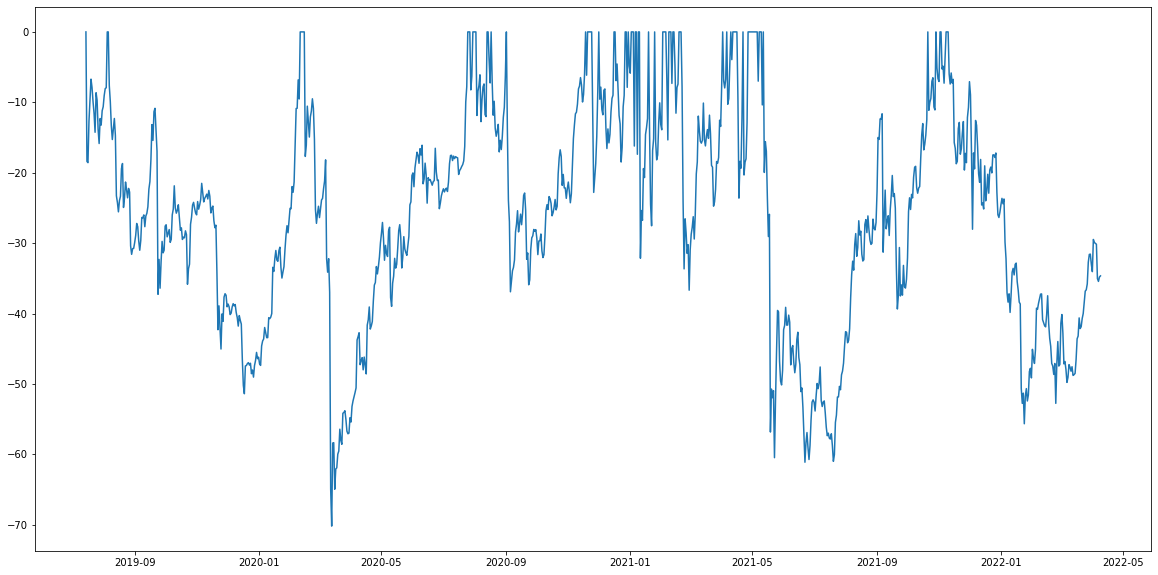

In [20]:
plt.figure(figsize=(20,10))
plt.plot(data['date'], data['DrawDown'])

